<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#load-dataset" data-toc-modified-id="load-dataset-1">load dataset</a></span></li><li><span><a href="#explore-dataset" data-toc-modified-id="explore-dataset-2">explore dataset</a></span><ul class="toc-item"><li><span><a href="#labels" data-toc-modified-id="labels-2.1">labels</a></span></li><li><span><a href="#fruits,-veg,-nuts" data-toc-modified-id="fruits,-veg,-nuts-2.2">fruits, veg, nuts</a></span></li><li><span><a href="#groups" data-toc-modified-id="groups-2.3">groups</a></span></li><li><span><a href="#categories" data-toc-modified-id="categories-2.4">categories</a></span></li><li><span><a href="#barcode" data-toc-modified-id="barcode-2.5">barcode</a></span></li><li><span><a href="#stores" data-toc-modified-id="stores-2.6">stores</a></span></li><li><span><a href="#name" data-toc-modified-id="name-2.7">name</a></span></li></ul></li><li><span><a href="#NS-comparison" data-toc-modified-id="NS-comparison-3">NS comparison</a></span><ul class="toc-item"><li><span><a href="#label-VS-score" data-toc-modified-id="label-VS-score-3.1">label VS score</a></span></li><li><span><a href="#merging-dfs" data-toc-modified-id="merging-dfs-3.2">merging dfs</a></span></li><li><span><a href="#label-VS-label" data-toc-modified-id="label-VS-label-3.3">label VS label</a></span></li><li><span><a href="#score-VS-score" data-toc-modified-id="score-VS-score-3.4">score VS score</a></span></li></ul></li><li><span><a href="#OTHER-CODE" data-toc-modified-id="OTHER-CODE-4">OTHER CODE</a></span></li></ul></div>

In [1]:
#  generic packages 
import json
import pandas as pd
import numpy as np
import gc 
# plotting packages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

# interacting plotting
# from bokeh.plotting import figure, output_file, show

# packages for stats
from scipy import stats
import powerlaw
import itertools as itt

# show all cell outputs
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# load dataset

In [2]:
%%time

full_df = pd.read_csv('/Users/lazzari/Downloads/full_openfoodfacts_products.csv',encoding='utf-8',sep='\t')
full_df.shape

<string>:2: DtypeWarning: Columns (0,3,5,24,25,26,28,36,37,38,39,41,49) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 18.5 s, sys: 1.43 s, total: 19.9 s
Wall time: 20 s


we are only intersted in  products sold in CH

there are in total 141 unique `countries_tags` that contains CH (including CH alone)

In [3]:
# code to show some examples
# [my_url for my_url in full_df.url[full_df.countries_tags=='en:spain,en:switzerland']]

In [3]:
# convert to str !
full_df.countries_tags = full_df.countries_tags.astype('str')

# remove NaNs
full_df = full_df[full_df.countries_tags.notnull()]

In [4]:
### include only en:switzerland
###  switz_df = full_df.loc[pd.Series(full_df.countries_tags=='en:switzerland').values]

## include instead products for all tags with CH
switz_df = full_df[full_df.countries_tags.str.contains('switz')]

switz_df.shape

(16366, 173)

In [ ]:
 ## using `countries_en` feature is equivalent
# country_df = full_df[full_df.countries_en=='Switzerland']
# country_df.shape

In [5]:
# remove full dump
del full_df
gc.collect();

see frequencies of different tags

In [6]:
switz_df.countries_tags.value_counts()

en:switzerland                                                                                                                                                                                                                                                             13828
en:france,en:switzerland                                                                                                                                                                                                                                                    1882
en:germany,en:switzerland                                                                                                                                                                                                                                                    217
en:france,en:germany,en:switzerland                                                                                                                                                  

# explore dataset 

## labels

In [86]:
print(switz_df['labels'].nunique())
print(switz_df.labels_tags.nunique())
print(switz_df.labels_en.nunique())

932
778
778


In [88]:
switz_df.labels_en.unique()

array([nan, 'Fabrique-au-canada', 'Kosher,Orthodox Union Kosher',
       'Kosher,Gluten-free,Orthodox Union Kosher',
       'fr:Glutenfrei,fr:Gruner-punkt',
       'Kosher,Orthodox Union Kosher,Pur-beurre', 'Organic',
       'fr:Classe-a', 'fr:Gruner-punkt', 'Aoc',
       'Fair trade,Kosher,Max Havelaar,Green Dot,fr:Caring-dairy',
       'Deconseille-aux-femmes-enceintes', 'No Trans Fat', 'Made-in-usa',
       'Sustainable Palm Oil,Palm oil free', 'Green Dot',
       'Gluten-free,No alcohol',
       'Deconseille-aux-femmes-enceintes,Deconseille-a-certaines-categories-de-personnes,Point-vert',
       'Low or no salt,Low or no sugar,Vegetarian,Kosher,Vegan,No added sugar,Gluten-free,No added salt,No cholesterol,No GMOs,No lactose,fr:Care-enough',
       'fr:Ch-340', 'Organic,Vegetarian,Vegan',
       'Organic,EU Organic,fr:AB Agriculture Biologique',
       'fr:Certification-bio-be-bio-02,fr:Label-de-qualite-aha-centre-d-allergie-suisse',
       'Organic,de:Sial-innovation-paris-2014',
 

## fruits, veg, nuts

In [89]:
switz_df['fruits-vegetables-nuts-estimate_100g'].notnull().sum()

switz_df['fruits-vegetables-nuts_100g'].notnull().sum()

71

57

## groups

In [90]:
switz_df.shape[0]
switz_df.pnns_groups_1.notnull().sum()
switz_df.pnns_groups_2.notnull().sum() 

16366

5288

5528

In [91]:
switz_df.pnns_groups_1.value_counts()

unknown                    2322
Sugary snacks               608
Cereals and potatoes        452
Milk and dairy products     431
Beverages                   352
Composite foods             337
Fat and sauces              225
Fish Meat Eggs              218
Fruits and vegetables       181
Salty snacks                102
sugary-snacks                39
fruits-and-vegetables        21
Name: pnns_groups_1, dtype: int64

In [92]:
switz_df.pnns_groups_2.value_counts()

unknown                             2322
One-dish meals                       261
Alcoholic beverages                  240
Biscuits and cakes                   232
Cereals                              207
Sweets                               207
Milk and yogurt                      175
Chocolate products                   169
Dressings and sauces                 167
Cheese                               166
Sweetened beverages                  154
Bread                                105
Breakfast cereals                     90
Appetizers                            84
Fruit juices                          79
Vegetables                            79
Non-sugared beverages                 74
Processed meat                        72
Fish and seafood                      68
Fruits                                66
Fats                                  58
Pizza pies and quiche                 53
Ice cream                             52
Meat                                  40
pastries        

## categories

In [93]:
switz_df.categories.notnull().sum()

4318

In [94]:
[my_cat for my_cat in switz_df.main_category.astype('str').unique() if ('en:' in my_cat) ]

['en:moutardes',
 'en:groceries',
 'en:petit-dejeuners',
 'en:sugary-snacks',
 'en:plant-based-foods-and-beverages',
 'en:aliments-d-origine-vegetale',
 'en:sweeteners',
 'en:beverages',
 'en:fromages',
 'en:desserts',
 'en:salty-snacks',
 'en:dietary-supplements',
 'en:ale',
 'en:dairies',
 'en:meals',
 'en:pickles',
 'en:fresh-foods',
 'en:pie-dough',
 'en:meats',
 'en:farming-products',
 'en:seafood',
 'en:frozen-foods',
 'en:fromage-a-pate-dure',
 'en:terrine',
 'en:chorizo',
 'en:yaourt',
 'en:olives',
 'en:whole-olives',
 'en:labeled-products',
 'en:fruit-juices',
 'en:breakfasts',
 'en:canned-foods',
 'en:fish-and-meat-and-eggs',
 'en:vinegars',
 'en:green-olives',
 'en:fruits-en-conserve',
 'en:spreads',
 'en:chips-and-fries',
 'en:pies',
 'en:tabbouleh',
 'en:fats',
 'en:oeufs-de-poisson',
 'en:crepes-and-galettes',
 'en:fruit-juices-and-nectars',
 'en:dried-products',
 'en:schokoladen',
 'en:chocolats-au-lait-fourres',
 'en:milchschokoladen',
 'en:christmas-foods-and-drinks',

## barcode 

find good products identifier that match with our dataset

In [7]:
# barcode is imported as num ...
switz_df.code = switz_df.code.astype('int',copy=False).astype('str',copy=False)

# check uniqueness
switz_df.code.value_counts().value_counts()

1    16366
Name: code, dtype: int64

## stores

In [8]:
switz_df.stores.notnull().sum()

1974

In [9]:
switz_df.stores.value_counts()

Migros                                                                              942
Coop                                                                                226
Carrefour                                                                            66
Lidl                                                                                 41
Leclerc                                                                              29
migros                                                                               28
Franprix                                                                             27
sky                                                                                  25
Super U                                                                              25
Auchan                                                                               24
Cora                                                                                 22
Edeka                           

## name

In [11]:
print(switz_df.generic_name.nunique())
print(switz_df.product_name.nunique())

1594
12173


mind that `product_name` is __NOT unique__

In [12]:
switz_df.product_name.value_counts().value_counts().sort_values()

13        1
12        1
10        1
9         1
8         1
7         5
6         9
5        15
4        47
3       102
2       428
1     11562
Name: product_name, dtype: int64

# NS comparison

load our nutri-score

In [13]:
our_df = pd.read_csv('./nutr_&_categ.csv')
our_df.shape

(24233, 58)

back to OFF dataset:

mind that `nutrition_grade_uk` is empty ...so we can remove it

In [14]:
print(switz_df.nutrition_grade_uk.notnull().sum())

switz_df.drop('nutrition_grade_uk',axis=1,inplace=True)

0


fix useful cols names in OFF dataframe

In [15]:
# rename bacode in OFF dataset
switz_df.rename(columns=({'code':'barcode'}),inplace=True)

# rename ns in OFF dataset
switz_df.rename(columns=({'nutrition-score-fr_100g':'off_ns_score'}),inplace=True)

## label VS score

OFF have computed NS for not so many products...

In [16]:
print(switz_df.nutrition_grade_fr.notnull().sum())
print(switz_df.off_ns_score.notnull().sum())

3301
3301


first labels in both df

In [17]:
switz_df.sort_values(['nutrition_grade_fr'],inplace=True)

our_df.sort_values(['ns_label'],inplace=True)

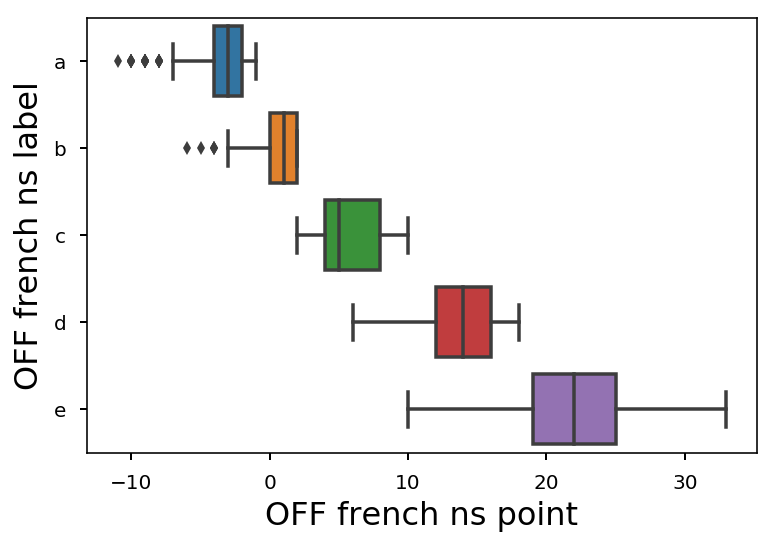

In [18]:
# OFF data
sns.boxplot(data=switz_df,
            orient='h',
            x='off_ns_score',
            y='nutrition_grade_fr')

plt.xlabel('OFF french ns point',size=16)
plt.ylabel('OFF french ns label',size=16);

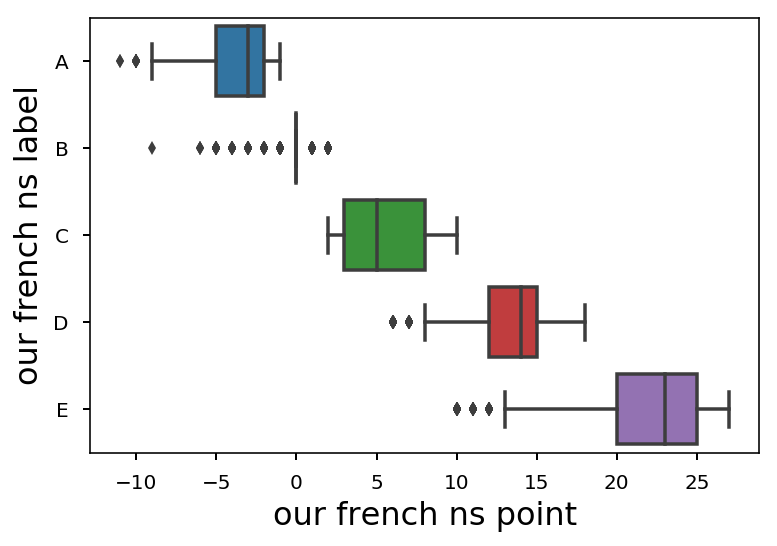

In [21]:
# GR data 
sns.boxplot(data=our_df,
            orient='h',
            x='nutri_score',
            y='ns_label')

plt.xlabel('our french ns point',size=16)
plt.ylabel('our french ns label',size=16);

## merging dfs

identify _how many unique barcodes_ there are, with nonnull NS – OFF DF is limiting 

In [22]:
print(switz_df[switz_df.off_ns_score.notnull()].barcode.nunique())
print(our_df[our_df.nutri_score.notnull()].barcode.nunique())

3301
24233


merge has to be based on __barcode__

In [23]:
merged_df = our_df.merge(switz_df[['barcode','off_ns_score','nutrition_grade_fr']],
                         on='barcode');
# ,'nutrition_grade_fr'

show changes __after merging__...

In [24]:
print(our_df.shape)
print(switz_df.shape)
print(merged_df.shape)

(24233, 58)
(16366, 172)
(14240, 60)


In [25]:
# OFF ns after merging
print(switz_df.off_ns_score.notnull().sum())
print(merged_df.off_ns_score.notnull().sum())

3301
2816


In [26]:
# GR ns after merging
print(our_df.nutri_score.notnull().sum())
print(merged_df.nutri_score.notnull().sum())

24233
14240


## label VS label

In [ ]:
# good_labels = merged_df.nutrition_grade_fr.notnull() & merged_df.ns_label.notnull()

# sns.jointplot(x=merged_df[good_labels].nutrition_grade_fr,y=merged_df[good_labels].ns_label)

# plt.xlabel('OFF labels',size=16)
# plt.ylabel('our labels',size=16)

## score VS score

keep only non null for OFF and GR score

In [27]:
good_scores = merged_df.off_ns_score.notnull() & merged_df.nutri_score.notnull()

my_upp = max(merged_df.nutri_score.max(),merged_df.off_ns_score.max())
my_low = min(merged_df.nutri_score.min(),merged_df.off_ns_score.min())

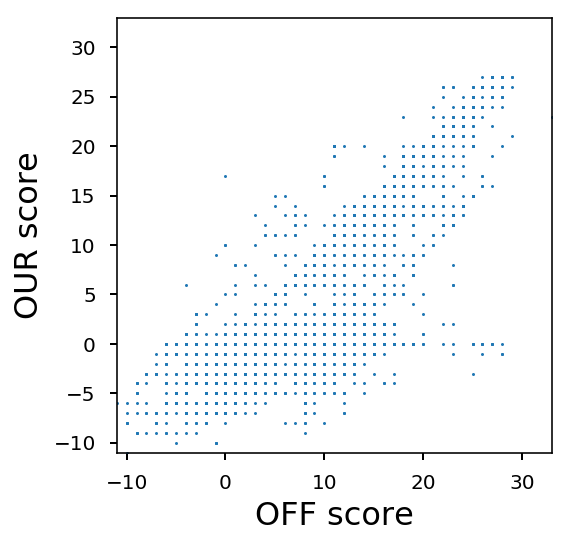

In [31]:
my_plot = merged_df[good_scores].plot(x='off_ns_score',y='nutri_score',
                                      marker='.',linestyle='',legend=None,ms=3)


plt.xlim(my_low,my_upp)
plt.ylim(my_low,my_upp)

my_plot.set_aspect('equal')

# plt.legend()

plt.xlabel('OFF score',size=16)
plt.ylabel('OUR score',size=16);

see how much they differ ...

`off_ns_score` > `nutri_score` means that we are being 'more generous' == better nutritional values

( doesn't mean we are wrong...)

add difference column and plot its hist

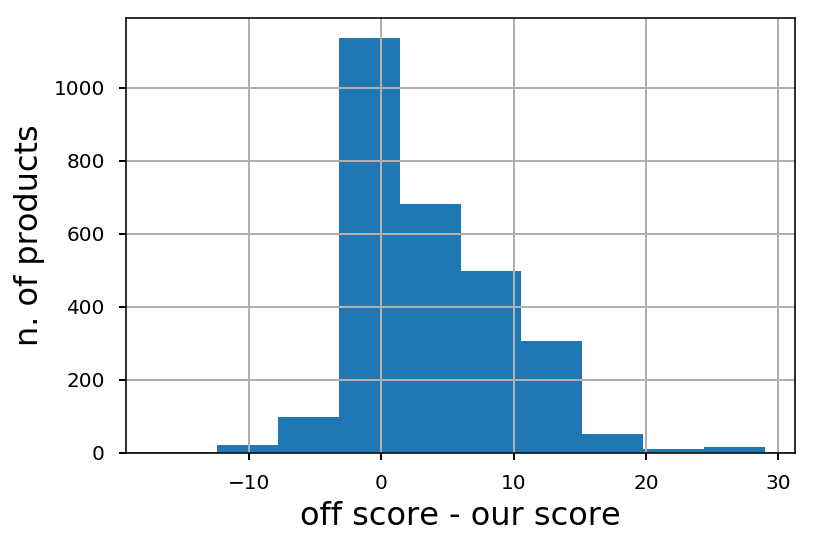

In [32]:
merged_df['difference'] = merged_df.off_ns_score - merged_df.nutri_score

#...and  sort df by difference
merged_df.sort_values(by='difference',inplace=True,ascending=False)

merged_df.difference.hist()
plt.ylabel('n. of products',size=16)
plt.xlabel('off score - our score',size=16);

products for which we are 'too genereous' 

In [33]:
merged_df.loc[merged_df.difference > 20,\
              ['id','name_simple','barcode','off_ns_score','nutri_score','difference']]

# merged_df.loc[good_scores,

,id,name_simple,barcode,off_ns_score,nutri_score,difference
5252,12951,Migros Léger Joghurt Drink Banane,22140807,28.0,-1,29.0
1324,5838,Kikkoman Teriyaki Marinade & Sauce,8715035210301,28.0,-1,29.0
7205,15280,Ferrero Kinder,4008400511825,28.0,0,28.0
3667,11015,Alnatura Bretzels à l'épeautre et au chocolat,4104420145245,25.0,-3,28.0
4909,23127,NaN,3046920084000,27.0,0,27.0
5188,23364,NaN,7610036003703,27.0,0,27.0
4235,19733,Milka,7622300185015,27.0,0,27.0
5280,12947,Migros Léger Joghurt Drink Moka,22140814,26.0,-1,27.0
7802,3897,Lindt Crunchy Nougat,4000539221705,26.0,0,26.0
5272,15757,Nutella,4008400404127,26.0,0,26.0


products for which they are 'too genereous' 

In [34]:
merged_df.loc[merged_df.difference < 0,\
              ['id','name_simple','barcode','off_ns_score','nutri_score','difference']]

,id,name_simple,barcode,off_ns_score,nutri_score,difference
8053,19369,Cremo - Choky,76123542,0.0,1,-1.0
3533,1347,Migros Bolets séches,7610200082336,-8.0,-7,-1.0
10925,8073,Boursault Fromage crémeux affiné,3175460000611,13.0,14,-1.0
8717,4365,UCAL chocolate milk,5601226041386,-3.0,-2,-1.0
259,14150,Croquettes de pomme de terre au four,7616800214030,-4.0,-3,-1.0
14208,6181,Coop Beurre,7610848046271,18.0,19,-1.0
14063,6194,FLORALP BEURRE DE CHOIX,7612300011223,18.0,19,-1.0
260,14149,Croquettes de rösti,7616800214078,-2.0,-1,-1.0
7187,1522,Léger Choco drink,22087164,-1.0,0,-1.0
11344,12399,Extra Gelée Framboises,7616800106045,12.0,13,-1.0


# OTHER CODE 

In [ ]:
# GR and Kirtan score compared - GR still missing some parts

sns.jointplot(data=merged_df,x='nutri_score',y='kir_score')